# Анализ поведения клиентов фитнес клуба с помощью инструментов машинного обучения
## Описание проекта
Сеть фитнес-клубов "Культурист-датасаентист" рассматривает новый вариант взаимодействия с клиентами на основе анализа данных.
### Задача
Одна из ключевых метрик, харакетеризующих лояльность клиентов, является отток клиентов - чем он меньше, тем лояльность выше. Однако зачастую в других сервисах клиент разрывает отношения открыто, чего нельзя сказать про фитнес-клубы. Уехал ли человек в отпуск, появились проблемы со здоровьем или он просто выгорел и ушёл "по-английски" не прощаясь.

Поэтому задача заключается в анализе электронных анкет клиентов, чтобы предсказать возможный уход клиента и попытаться удержать его. Для этого необходимо:
* сформировать портреты клиента, чтобы определить наиболее подверженные оттоку группы
* определить наиболее влияющие на отток признаки
* подготовить рекомендации по работе с целевой группой клиентов

### Описание данных
Данные клиента за предыдущий до проверки факта оттока месяц:


* `'gender'` — пол;
* `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
* `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `'Promo_friends'` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `'Phone'` — наличие контактного телефона;
* `'Age'` — возраст;
* `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* `'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
* `'Group_visits'` — факт посещения групповых занятий;
* `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
* `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `'Churn'` — факт оттока в текущем месяце.

### План работы
**1. Загрузка данных**
- [x] Загрузить необходимые библиотеки
- [x] Загрузить файл с данными

**2. Исследовательский анализ данных (EDA)**
- [x] Изучить пропуски
- [x] Изучить средние и стандартные отклонения методом `describe()`
- [x] Изучить средние значения признаков ушедших и оставшихся методом `groupby()`
- [x] Построить столбчатые диаграммы и распределения признаков ушедших и оставшихся
- [x] Построить матрицу корреляций

**3. Модель прогнозирования оттока клиентов**
- [x] Разбить данные на валидационную и обучающую выборки функцией `train_test_split()`
- [x] Обучить модель на train-выборке логистической регрессией и случайным лесом
- [x] Оценить accuracy, precision и recall для обеих моделей на валидационной метрике и определить какая из них лучше себя проявила

**4. Кластеризация клиентов**
- [x] Стандартизировать данные
- [x] Построить матрицу расстояний функцией `linkage()`
- [x] Нарисовать дендрограмму
- [x] Определить полученное число кластеров
- [x] Обучить модель кластеризации методом K-Means
- [x] Посмотреть на средние значения признаков кластеров для и попытаться *что-то определить)*
- [x] Построить распределения значений признаков для кластеров и попытаться *что-то определить)*
- [x] Посчитать для каждого кластера долю оттока методом `groupby()`
- [x] Определить надёжные и не очень кластеры

**5. Выводы и рекомендации**
- [x] Определить портрет клиента, наиболее подверженного оттоку
- [x] Определить наиболее влияющие на отток признаки
- [x] Сформулировать рекомендации по работе с целевой группой клиентов

## Загрузка данных
### Загрузка библиотек

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools

In [37]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Загрузка файла с данными

In [38]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

## Исследовательский анализ данных (EDA)
### Изучение пропусков

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В каждом столбце по 4000 значений. Все они не пустые. Предпосылок для наличия пропусков нет.

Немного парит незмеиность названий столбцов. Надо это подправить.

In [40]:
df.columns = df.columns.str.lower()

Ты - не ты, когда названия столбцов не в змеином регистре. Лучше?  
Лучше!

### Изучение средних и стандартных отклонений

In [41]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


О, у нас уже все категориальные переменные переведены в бинарную логику (0, 1). Очень удобно, если посмотреть в таких переменных на среднее значение - оно же будет процентом единичек, так что примерно можно сказать, что у нас поровну мужчин и женщин, такое же распределение на партнёрские организации, а ещё, из неприятного, по итогам этого месяца 26% клиентов у нас ушли. Хотя сказать, много это или мало можно только сравнив отток с притоком.

Ещё можно отметить, что в среднем клиенты ходят в зал до 4 месяцев, прежде, чем отвалятся, примерно по 2 занятия в неделю. Подавляющее большинство занимается у себя на районе.

### Изучение средних значений, построение столбчатых диаграмм и распределения признаков для ушедших и оставшихся

Для начала необходимо определить целевой признак. В данном случае это отток клиентов - `churn`. Остальные признаки закинем в отдельный датасет.

In [42]:
y = df['churn']
x = df.drop('churn', axis=1)

In [43]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Для столбчатых диаграмм и распределений воспользуемся функцией `distplot()` из библиотеки `seaborn`. Это позволит нам одновременно увидеть и столбцы значений, и распределения этих значений на одном графике. Также отметим на графиках средние значения по каждому признаку.

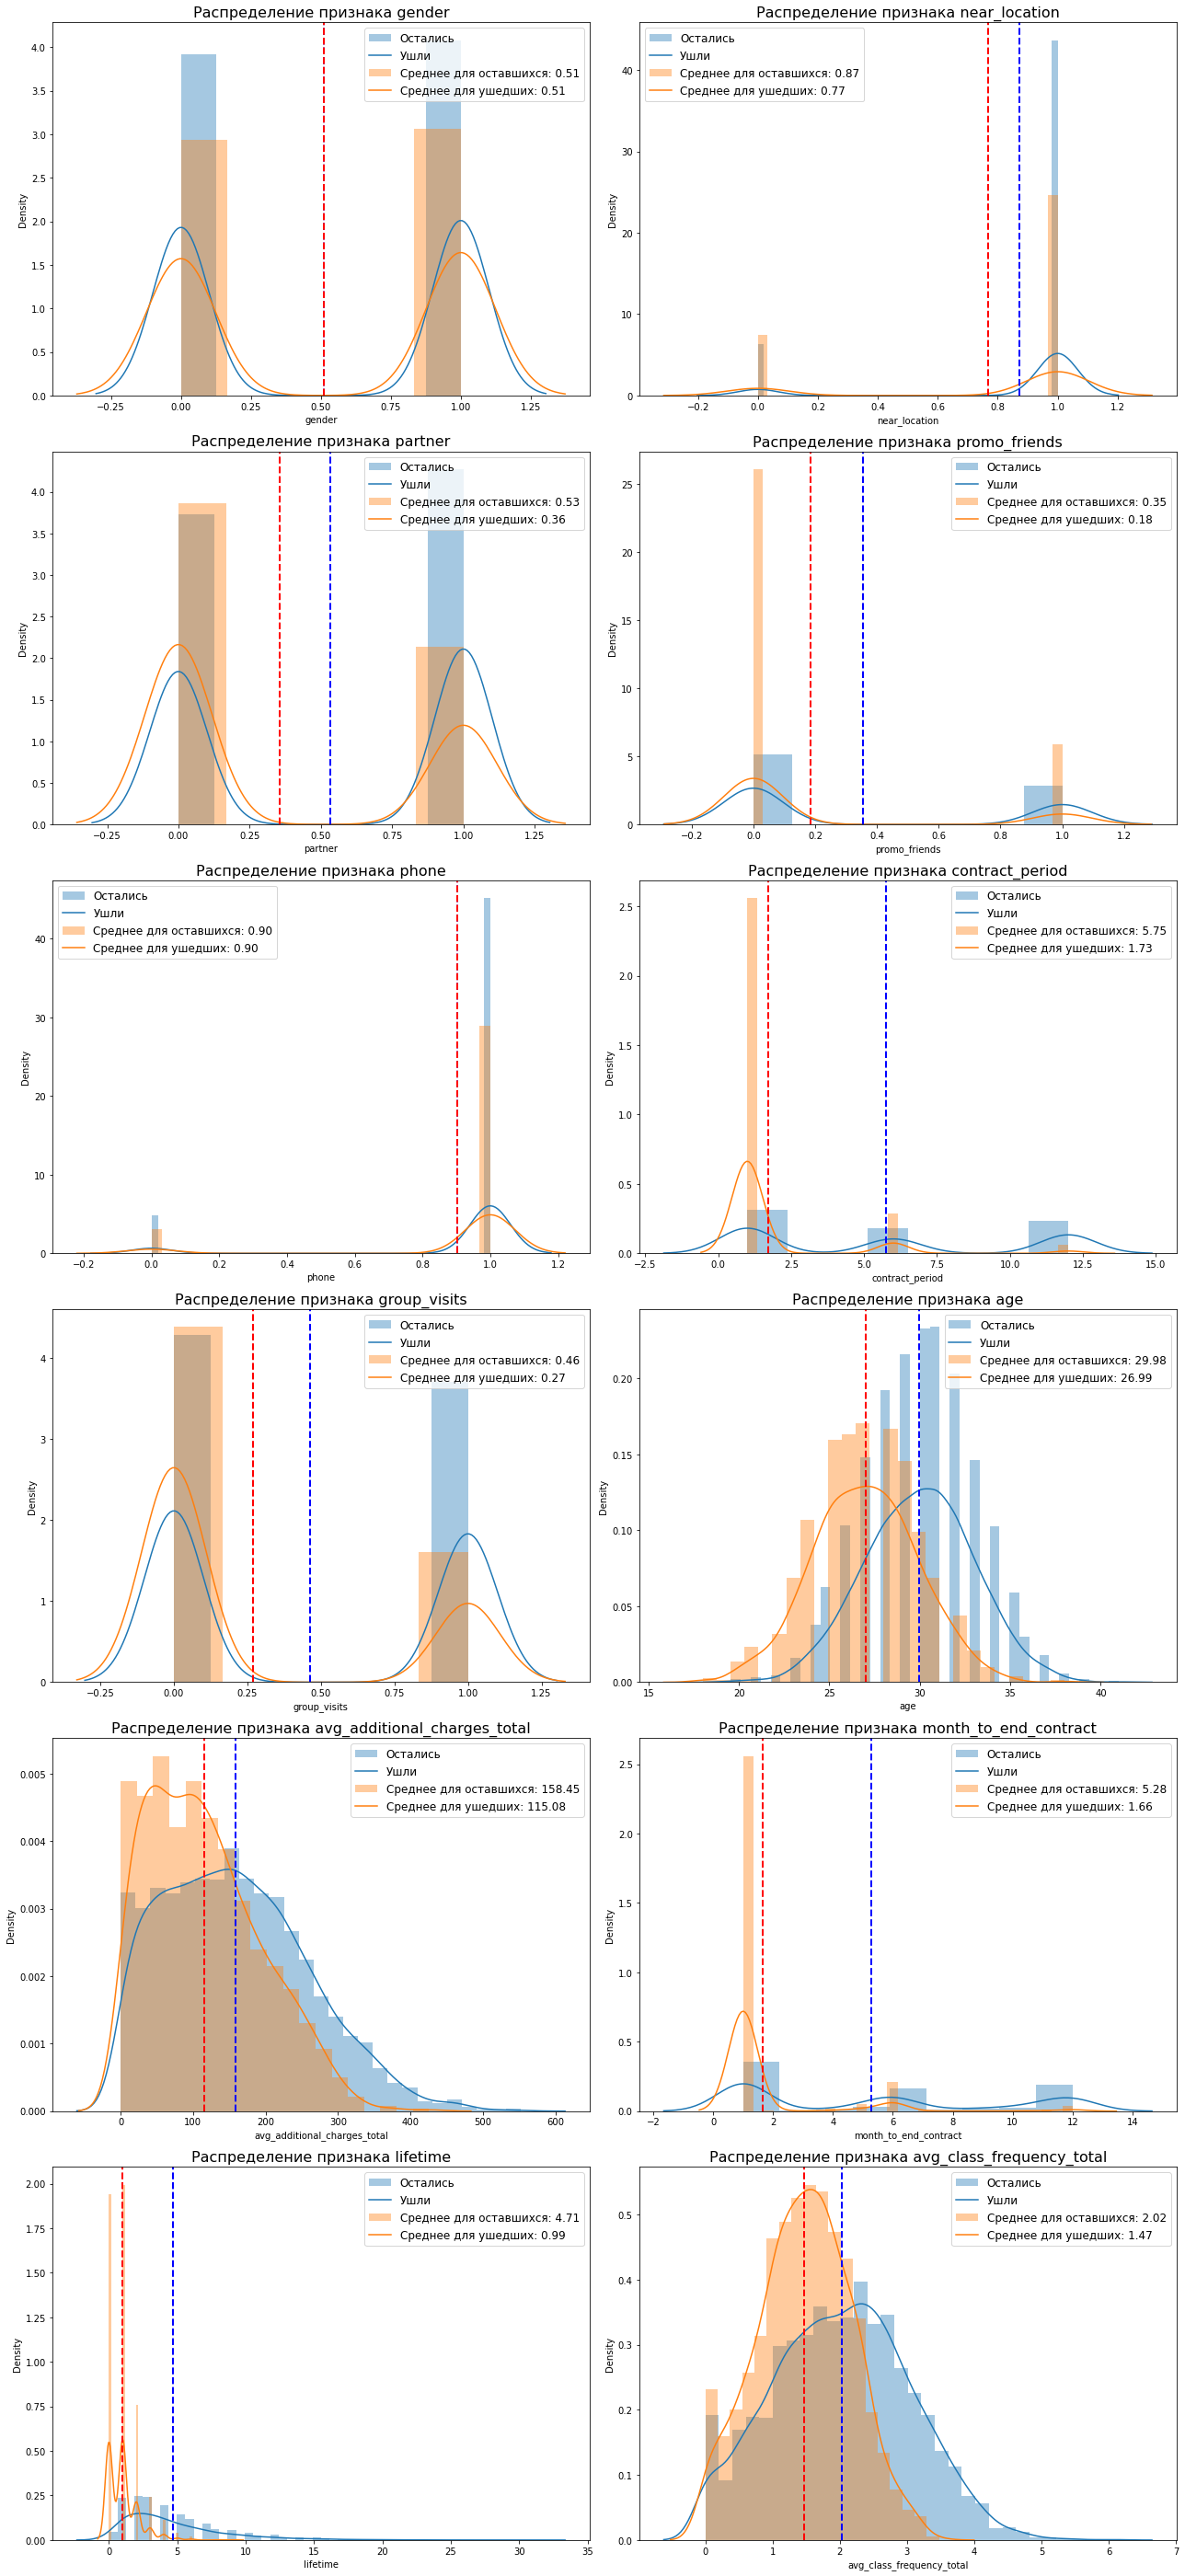

In [44]:
cols = x.columns # выберем нецелевые признаки

fig, ax = plt.subplots(int(len(cols)/2), 2, 
                         figsize=(18, int(len(cols)*3))) # задаём высоту в зависимости от количества признаков
ax = ax.ravel()

for col, ax in zip(cols, ax):
    sns.distplot(df[df['churn']==0][col], ax=ax, label='Остались')
    sns.distplot(df[df['churn']==1][col], ax=ax, label='Ушли')
    ax.axvline(df[df['churn']==0][col].mean(), color='b', linestyle='dashed', linewidth=2) # строим вертикальные линии
    ax.axvline(df[df['churn']==1][col].mean(), color='r', linestyle='dashed', linewidth=2) # со средними значениями признака
    ax.set_title(f'Распределение признака {col}', fontsize=16)
    ax.legend(
        labels=['Остались',
                'Ушли',
                'Среднее для оставшихся: {:.2f}'.format(df[df['churn']==0][col].mean()), # отразим средние значения в легенде
                'Среднее для ушедших: {:.2f}'.format(df[df['churn']==1][col].mean())
            
        ],
        fontsize=12
    )
    
fig.tight_layout()
plt.show()

Мы видим, что ушедшие клиенты чаще попадаются в зал из других районов, ими в 1,5 раза меньше оказываются сотрудники компании-партнёра, в 2 раза реже они оказывались участниками акции "Приведи друга" и участниками групповых занятий. В среднем оставшиеся клиенты имеют абонементы около 6 месяцев, а ушедшие около 2. Ушедшие в среднем "отживают" 1 месяц и уходят, и если начинают они с 1,5 посещений в неделю, то в конце своей "жизни" этот показатель стремится к 1, в то время как у старожилы занимаются почти по 5 месяцев и занимаются по 2 раза в неделю, отрицательных тенденций не наблюдается.

### Построение матрицы корреляций

In [45]:
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


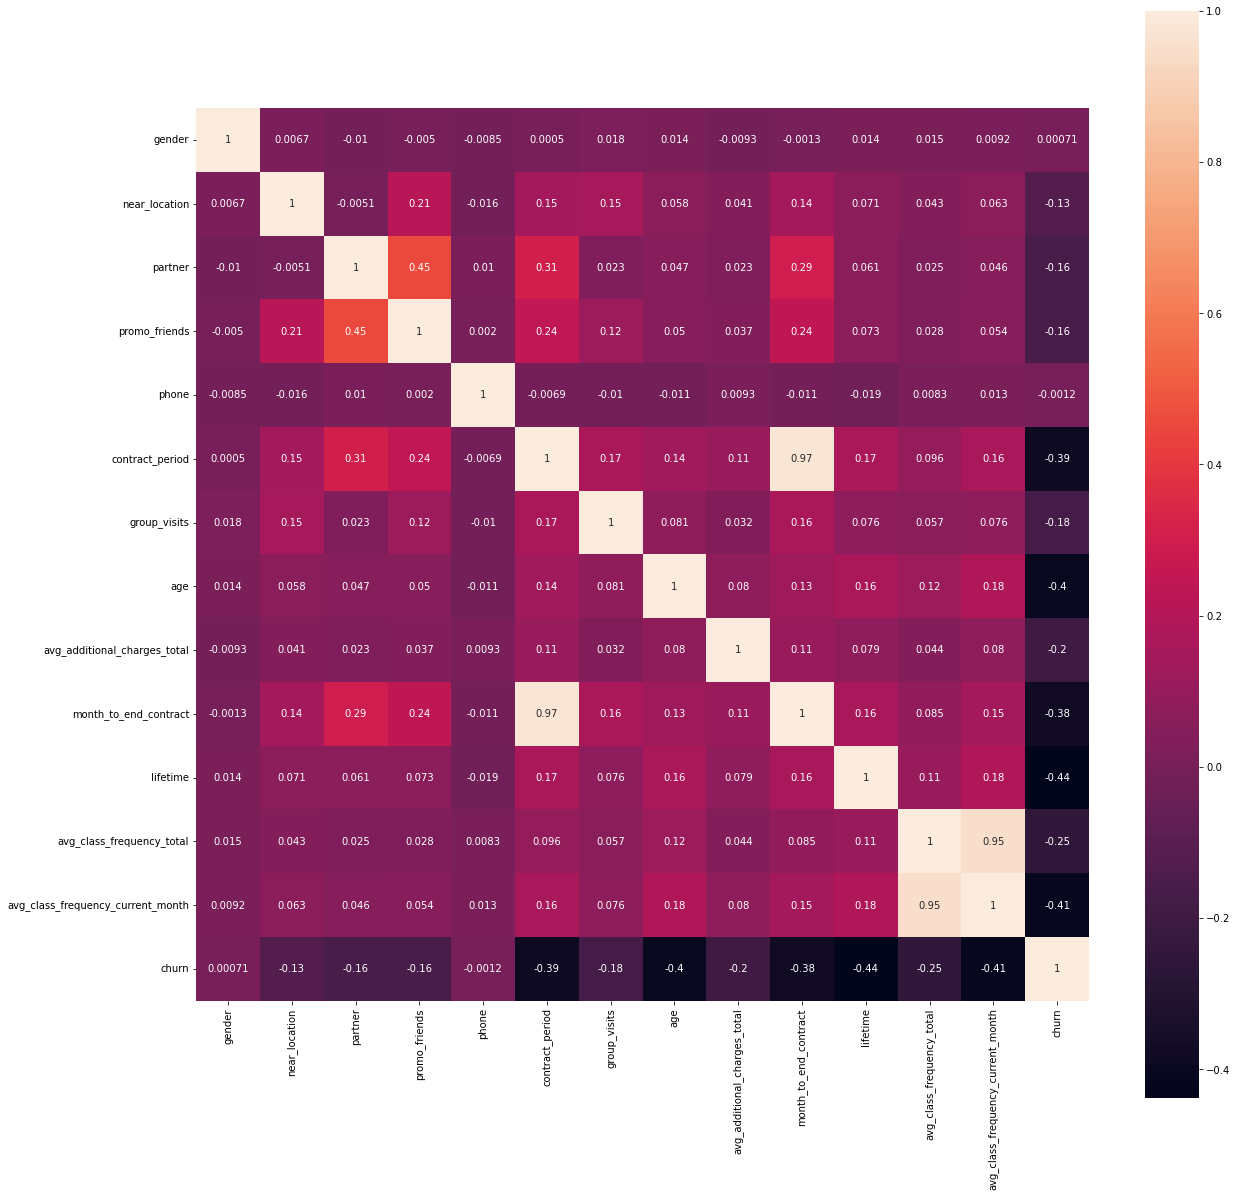

In [46]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), square = True, annot = True)
plt.show()

Как можно замтетить, ни один из признаков не даёт нам правильный ответ на этом этапе (более 0.9 по модулю). Однако видно, как сильно коррелируют между собой `contract_period` и `month_to_end_contract`, а также `avg_class_frequency_total` и `avg_class_frequency_current_month`, что логично: общий срок абонемента и оставший срок абонемента, общая и недавняя частота посещаемости в принципе об одном и том же. Вероятно, число признаков можно будет сократить.

Метрика, которая даёт нам больше информации по продолжительности действия абонемента - динамическая. Поэтому лучше оставить `month_to_end_contract`. Что касается посещаемости зала, то нам по-хорошему нужно снести один из показателей, чтобы не возникало мултиколлинеарности, но нам интересно оценивать как меняется активность посетителей, поэтому добавим новый столбец, в котором будет разница двух признаков - активности недавней и активности общей. Если она ярко выраженно отрицательная, то клиент сбавил обороты и звоночек тревожный, как мы могли увидеть при изучении средних на разных вариантах оттока; а если она около нуля, то у нас стабильный осознанный ЗОЖ-ник, бояться не о чем. Плюс, это позволит нам снести оба показателя, которые будут портить всю картину.

In [47]:
df['activity'] = df['avg_class_frequency_current_month'] - df['avg_class_frequency_total']
df = df.drop(['avg_class_frequency_total', 'avg_class_frequency_current_month', 'contract_period'], axis=1)

df = df[['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'group_visits', 'age', 'avg_additional_charges_total',
       'month_to_end_contract', 'lifetime', 'activity', 'churn']] # переставим для удобства отток всё так же в конец
df.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,activity,churn
0,1,1,1,1,0,1,29,14.227470,5.0,3,-0.020398,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,-0.012693,0
2,0,1,1,0,1,0,28,129.448479,1.0,2,-0.122596,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,0.151582,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,0.006194,0


Выведем новую матрицу корреляций и посмотрим, остались ли у нас ещё призраки мультиколлинеарности.

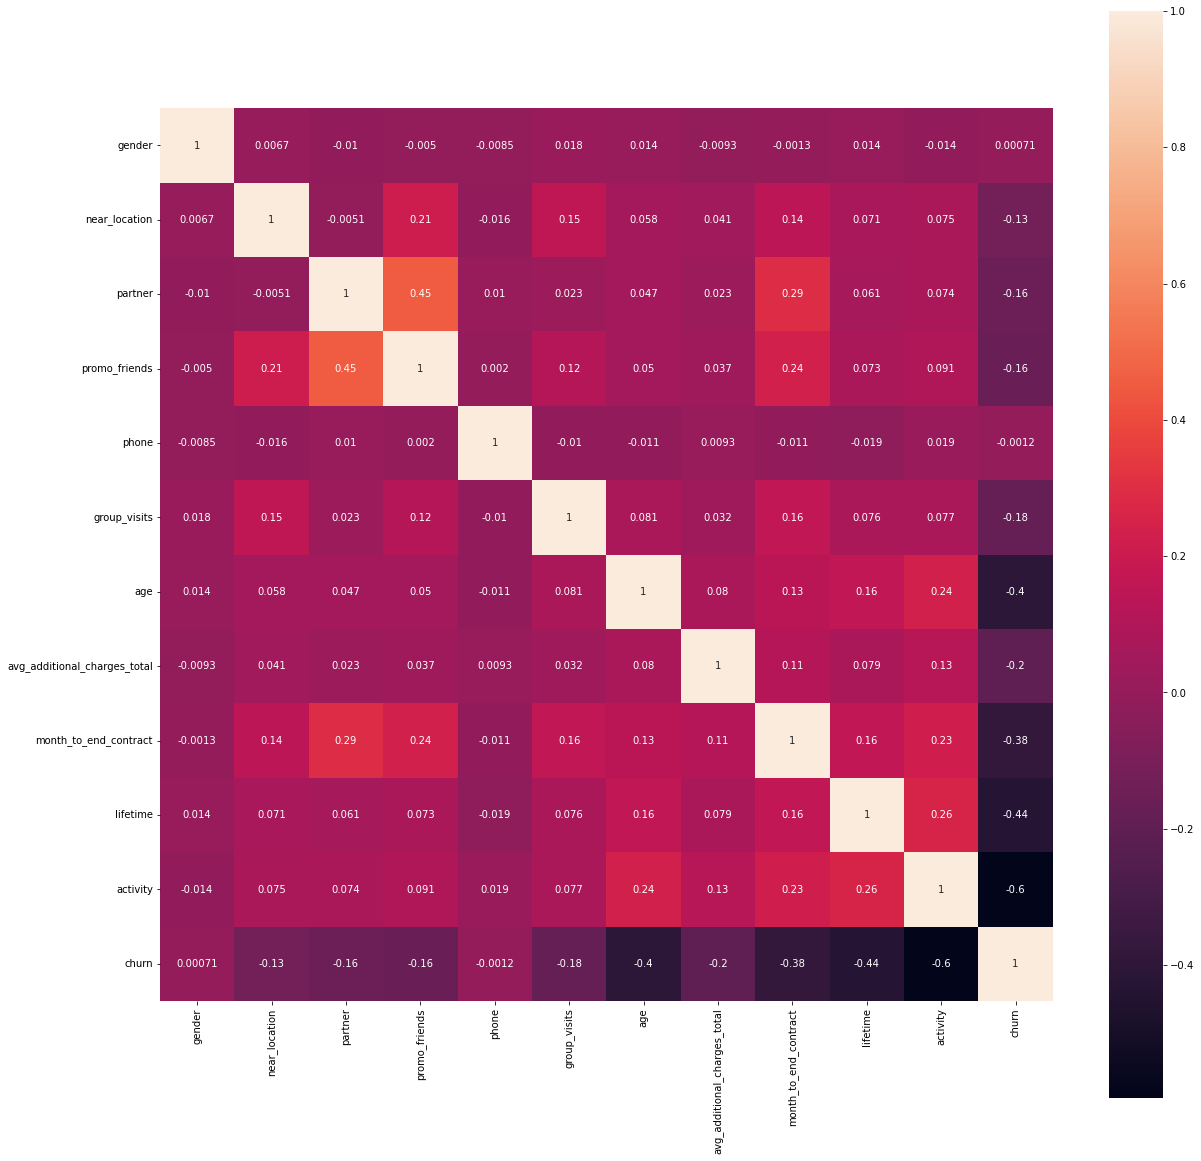

In [48]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), square = True, annot = True)
plt.show()

Отлично, от мултиколлинеарности ушли. И теперь у нас есть довольно интересный признак `activity`, который относительно неплохо коррелириует с оттоком.

## Модель прогнозирования оттока клиентов

Поскольку с нашим датафреймом произошли некоторые изменения, снова проведём переназначение переменных x и y.

In [49]:
y = df['churn']
x = df.drop('churn', axis=1)

Разделим модель на обучающую и валидационную выборку в отношении 80:20 - классический вариант. Тяжело в учении - легко в валидации.

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Чтобы у нас была возможность сравнивать веса, их необходимо привести к одному масштабу. Для этого мы проведём стандартизацию. Это значит, что все признаки необходимо привести к виду, близкому к нормальному (среднее = 0, $\sigma $ = 1)

In [51]:
scaler = StandardScaler()
scaler.fit(x_train) # обучение scaler на обучающей выборке методом fit
x_train_st = scaler.transform(x_train) # стандартизация обучающей выборки методом transform scaler 
x_test_st = scaler.transform(x_test) # стандартизация тестовой выборки методом transform scaler

### Логистическая регрессия
Поскольку в нашем случае целевой признак носит бинарный характер (1 - да, человек ушёл и 0 - нет, человек остался), то мы вправе решать задачу бинарной классификации. Для этого мы можем использовать алгоритм логистической регрессии.  

In [52]:
lr_model = LogisticRegression(solver='liblinear', random_state=0)
lr_model.fit(x_train_st, y_train)
lr_predictions = lr_model.predict(x_test_st)
lr_probabilities = lr_model.predict_proba(x_test_st)[:,1]

### Случайный лес
Воспользуемся также моделью случайного леса - ансамбль моделей, в основе которого деревья принятия решений, также основанной на бинарной булевой логике. Смысл взять несколько таких деревьев, которые будут использовать опыт друг друга случайным образом (поэтому лес и случайный). И если одно дерево даст не сильно хорошие показатели на валидируемой выборке, то с каждым новым опытом, даже неудачным, у нас будет на выходе получаться годное решение.

In [53]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(x_train_st, y_train)
rf_predictions = rf_model.predict(x_test_st)
rf_probabilities = rf_model.predict_proba(x_test_st)[:,1]

### Сравнение двух моделей

Определим функцию для вывода метрик классификаций. В данной работе нас интересуют три метрики: Accuracy - доля правильных ответов (отношение суммы истинных значений к общему количеству значений), Precision - точность, доля правильных ответов целевого класса (отношение истинно положительных значений к сумме истинно и ложно положительных), Recall - полнота, сколько реально истинных объектов мы обнаружили (отношение истинно положительных значений к сумме истинно положительных и ложно отрицательных).

Accuracy лучше всего работает при относительном равенстве классов, а здесь у нас отношение 3:1, так что будем относиться к показателю с осторожностью. Precision и Recall работают без привязки к классам. Precision используется в тех случаях, когда каждое определение моделью значения как истинное стоит ресурсов (как в случае выдаче кредита - не выдать его лучше, чем выдать, а потом вернуть обратно). Recall полезно использовать в случае диагностирования заболевания, когда лучше пациента отправить на дополнительное тестирование, чем отпустить человека с невыявленным заболеванием.

В нашем случае мы хотим использовать все три метрики.

Но я бы больше ориентировался на Recall. Как и в случае с "а точно больным?", наша модель может показать, что клиент уже и не клиент вовсе, а он просто уехал с семьёй в отпуск, а по прибытии начнёт заниматься спортом на прежнем уровне, а может ещё и наест дополнительную мотивацию. 

In [54]:
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    display(title)
    display('Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    display('Precision: {:.2f}'.format(precision_score(y_true, y_pred)))
    display('Recall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [55]:
print_all_metrics(
    y_test,
    lr_predictions,
    title='Метрики для модели логистической регрессии:'
)

'Метрики для модели логистической регрессии:'

'Accuracy: 0.93'

'Precision: 0.89'

'Recall: 0.83'

In [56]:
print_all_metrics(
    y_test,
    rf_predictions,
    title='Метрики для модели случайного леса:'
)

'Метрики для модели случайного леса:'

'Accuracy: 0.96'

'Precision: 0.94'

'Recall: 0.89'

Обе модели хороши, но модель логистической регрессии чуточку хуже. Ориентируемся на случайный лес в большей степени.

## Кластеризация клиентов
### Построение матрицы расстояния

In [57]:
df_sc = scaler.fit_transform(df) # стандартизируем данные
linked_df = linkage(df_sc, method='ward')
linked_df

array([[5.10000000e+02, 1.96900000e+03, 1.41981487e-02, 2.00000000e+00],
       [2.52000000e+03, 3.50300000e+03, 6.90441756e-02, 2.00000000e+00],
       [7.05000000e+02, 3.58500000e+03, 8.17722435e-02, 2.00000000e+00],
       ...,
       [7.98800000e+03, 7.99300000e+03, 8.35250314e+01, 1.29000000e+03],
       [7.99000000e+03, 7.99500000e+03, 9.03918709e+01, 2.71000000e+03],
       [7.99600000e+03, 7.99700000e+03, 1.10772886e+02, 4.00000000e+03]])

### Построение дендрограммы

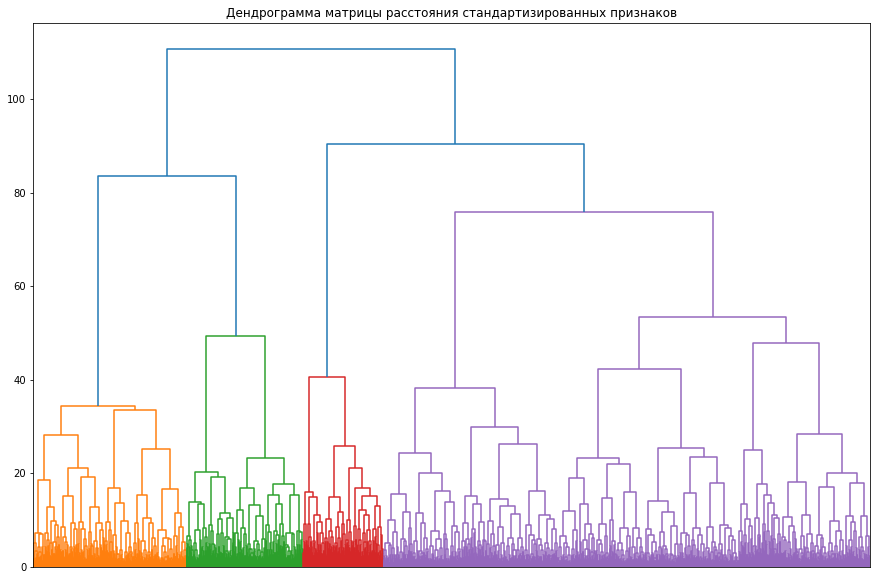

In [58]:
plt.figure(figsize=(15, 10))  
dendrogram(linked_df, orientation='top')
plt.title('Дендрограмма матрицы расстояния стандартизированных признаков')
plt.xticks([])
plt.show() 

Алгоритм определил у нас 4 кластера.

### Обучение модели кластеризации на основе алгоритма K-Means
Дендрограмма определила у нас 4 кластера, поэтому мы можем использовать алгоритм K-Means, в котором количество кластеров необходимо задавать вручную. Обучим модель исходя из количества кластеров `n = 4`.

In [59]:
km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(df_sc)

df['cluster_churn'] = labels
df.groupby('cluster_churn').mean()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,activity,churn
cluster_churn,,,,,,,,,,,,
0,0.509189,0.756757,0.344865,0.175135,0.995676,0.250811,26.903784,115.033731,1.580541,0.995676,-0.458605,1.000000
1,0.507056,0.960489,0.937912,0.825024,1.000000,0.526811,29.873942,158.621152,7.732832,4.632173,0.003906,0.015992
2,0.523560,0.866492,0.473822,0.308901,0.000000,0.429319,29.335079,145.023158,4.489529,3.968586,-0.117605,0.259162
3,0.509816,0.815337,0.276074,0.047239,1.000000,0.425153,29.993252,157.886858,3.615951,4.624540,0.010498,0.012270


Склонен к оттоку кластер 0, а самые надёжные кластеры 1 и 3.
Что для них характерно? Надёжные клиенты занимаются довольно давно, больше 4 месяцев. У них стабильная активность, на уровне 0.  Ненадёжные клиенты зачастую новички, отходившие месяц, у которых сильно падает активность. Попробовали - не моё. Они обычно моложе своих надёжных коллег. У ненадёжных ребят сильно ниже количество посещений групповых занятий. А вот акция "Приведи друга" не сильно оправдала себя. Партнёрская программа оказывает примерно такое же влияние. Да, у 1 кластера "Приведи друга" даёт 82,5%, и партнёрская программа 93%, но у кластера 3, из которого тоже нет оттока, почти без друзей занимаются, партнёрка всего на 27%. А из дендрограммы визуально видно, насколько 1 кластер больше 3. Также лояльные клиенты тратят на другие услуги в 1,5 раза выше ушедших. Также можно обратить внимание, что самый низкий коэффициент у расположения зала возле дома/работы.

Но это, можно сказать, исторические данные. Есть ещё кластер 2, у которого отток в районе 26%, и с ним предстоит работать, потому что люди оттуда начинают утекать и перебираться в 0 кластер. Какое поведение мы видим в кластере 2? Есть тенденция на снижение активности и лайфтайма. Что любопытно, у пользователей кластера 2 не указан телефон, но это не более, чем занимательная деталь.

In [60]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(15, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

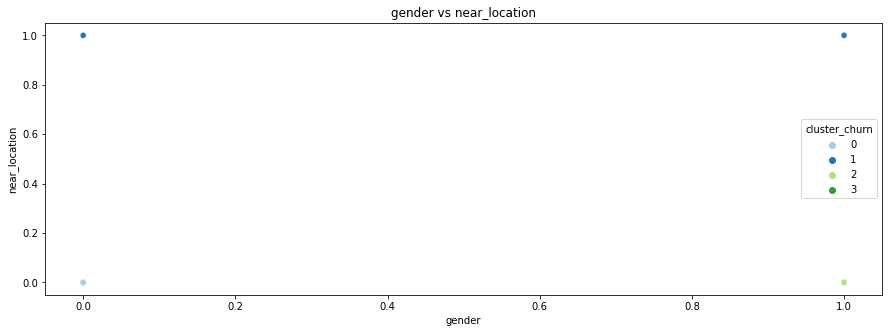

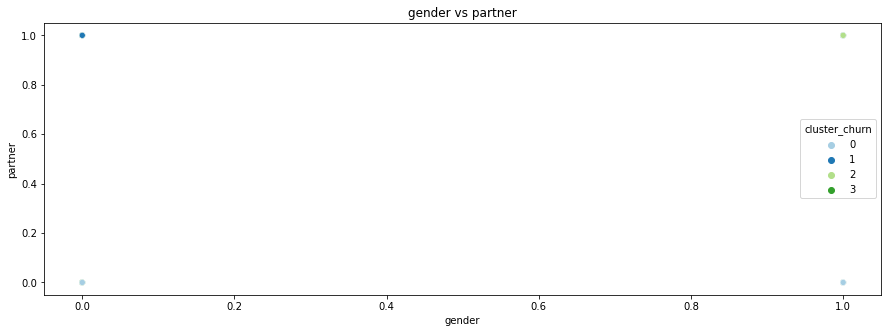

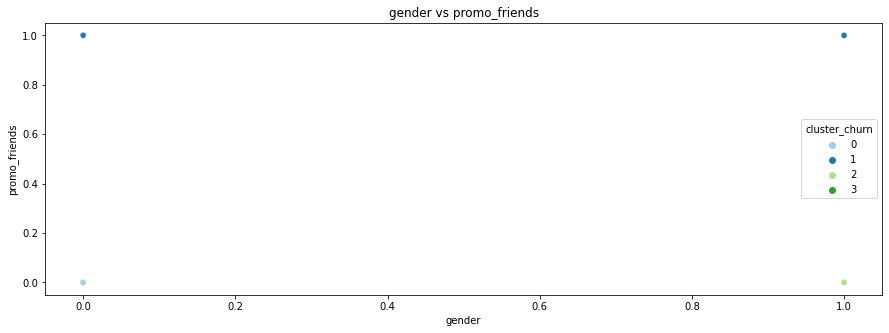

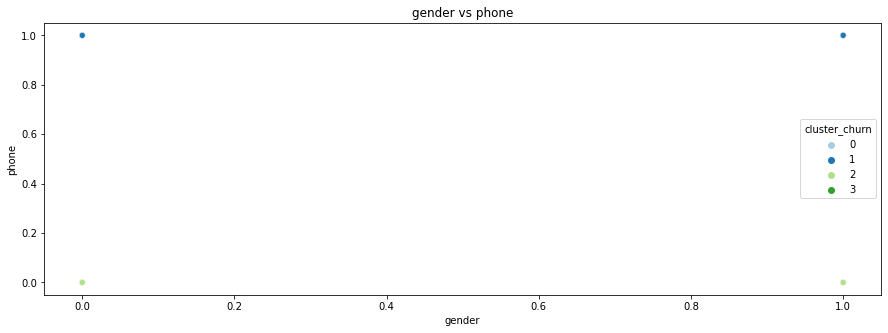

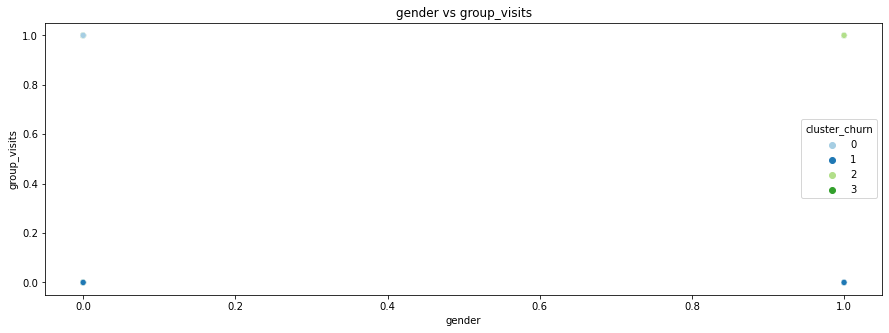

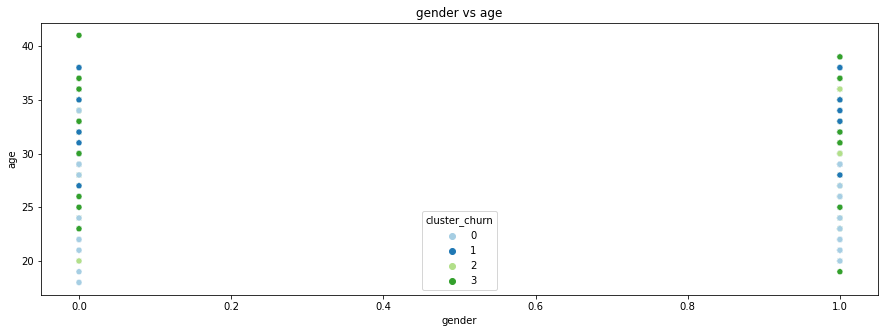

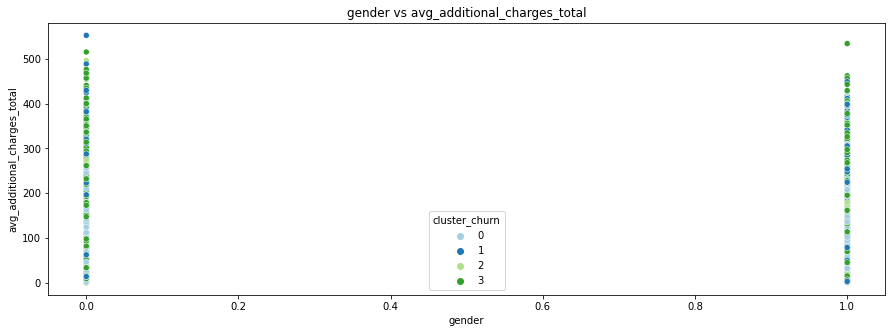

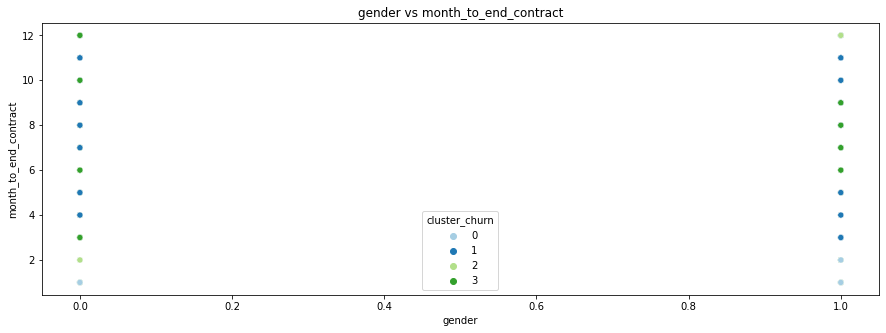

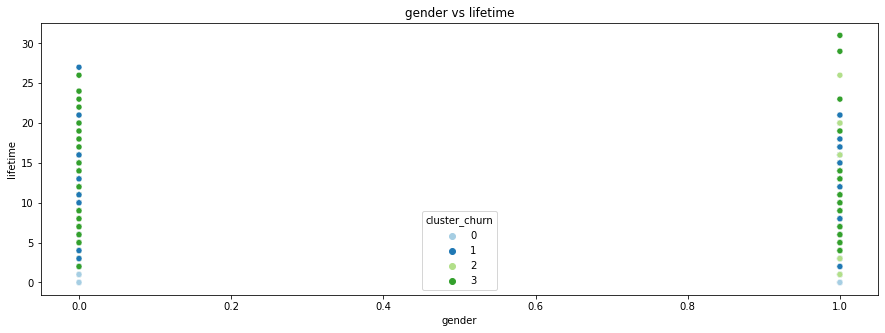

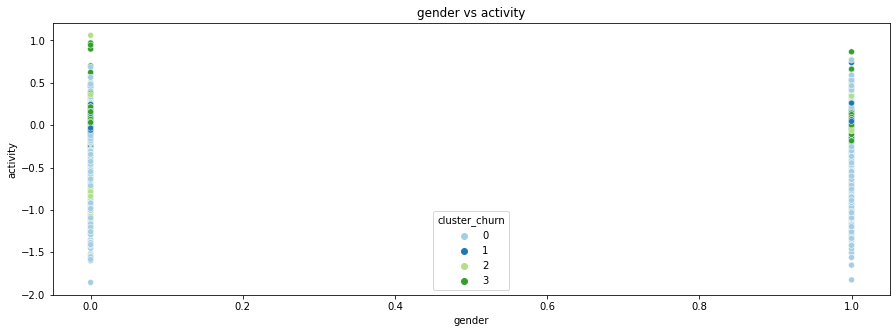

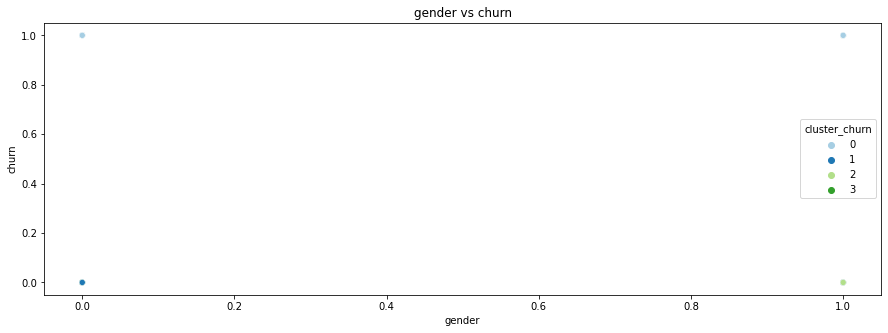

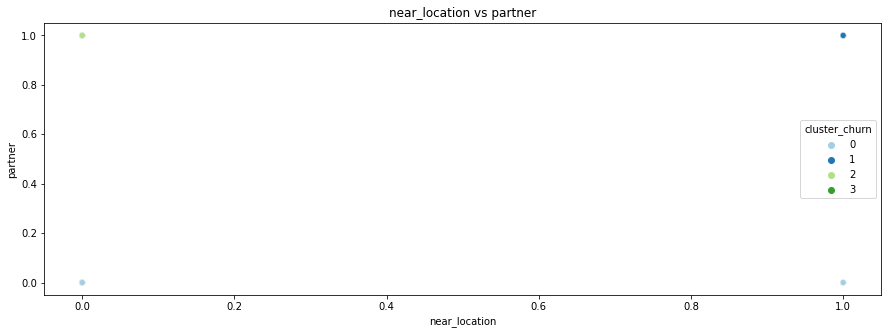

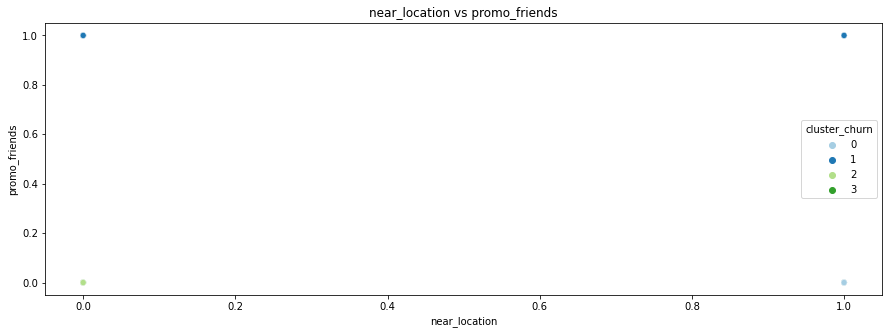

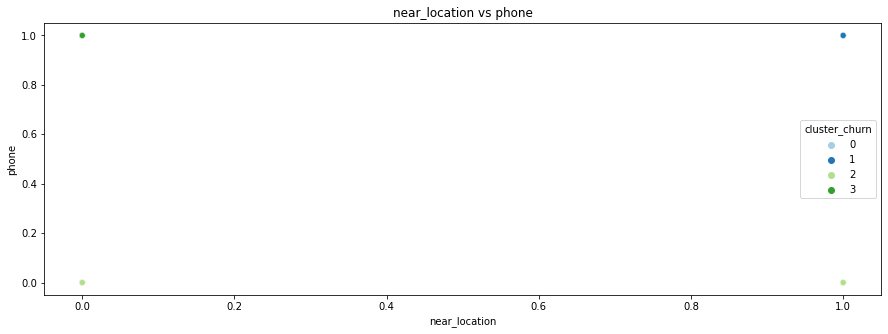

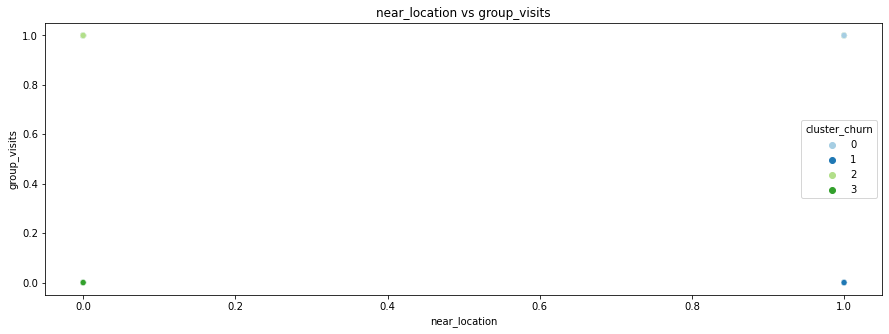

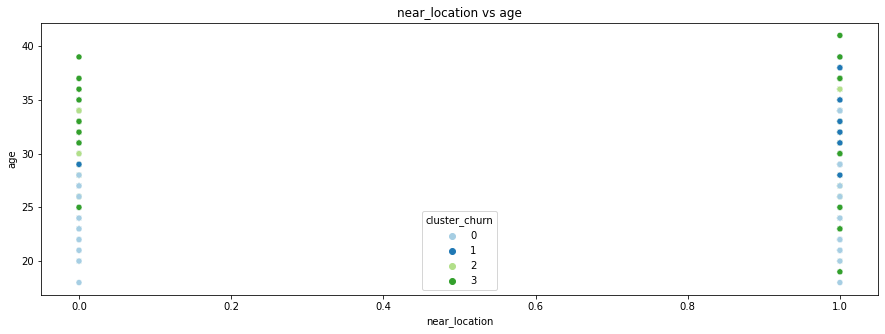

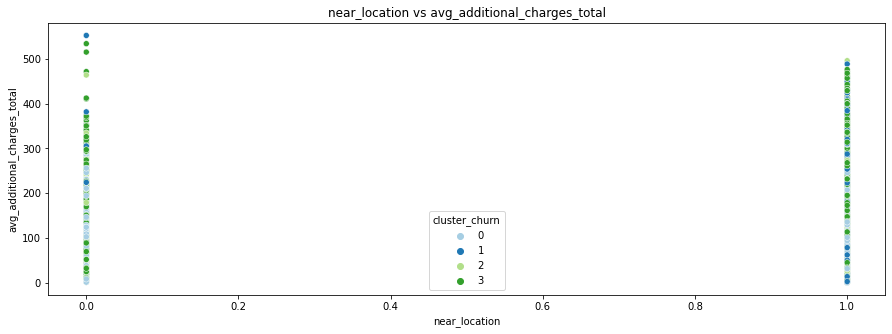

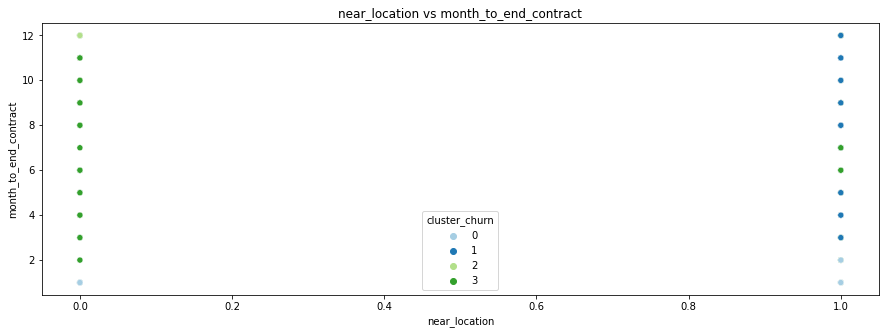

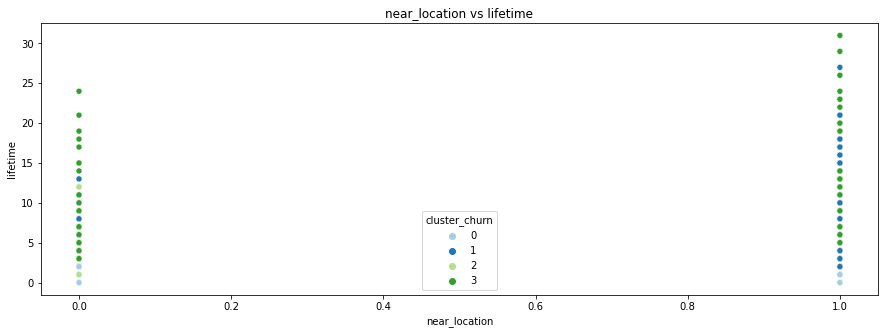

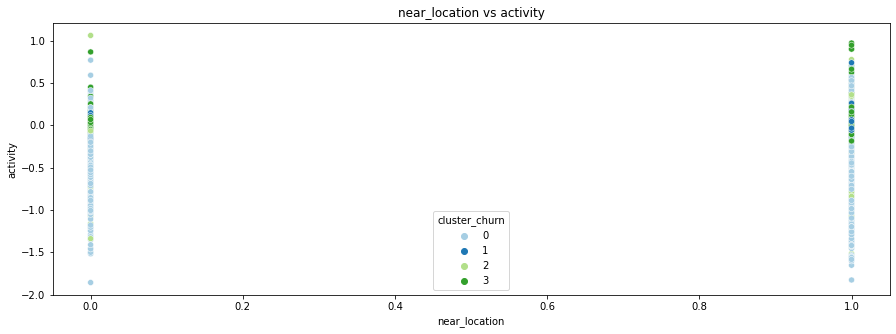

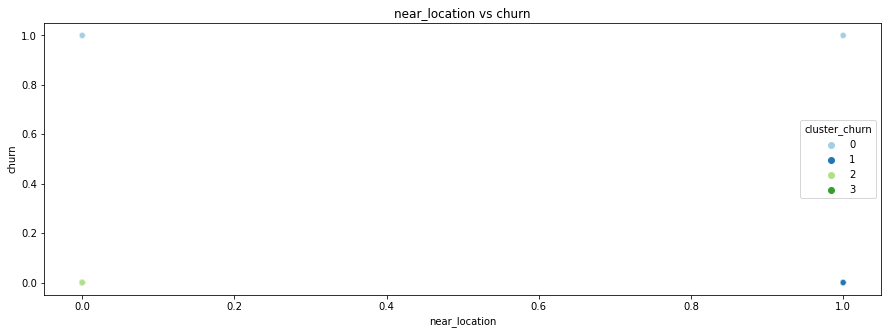

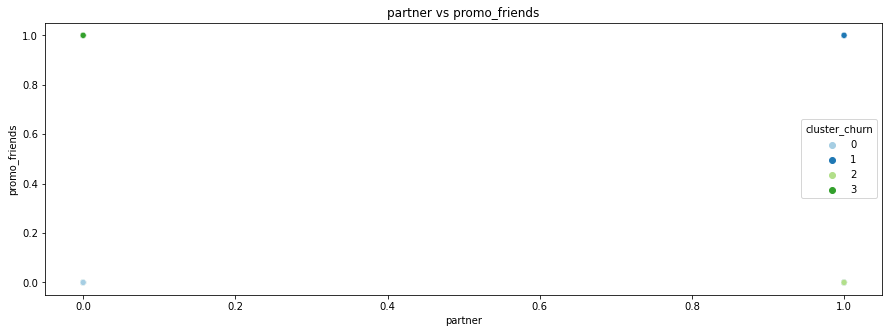

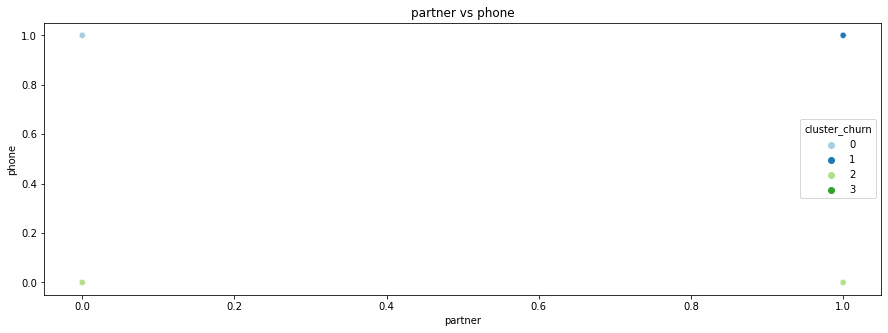

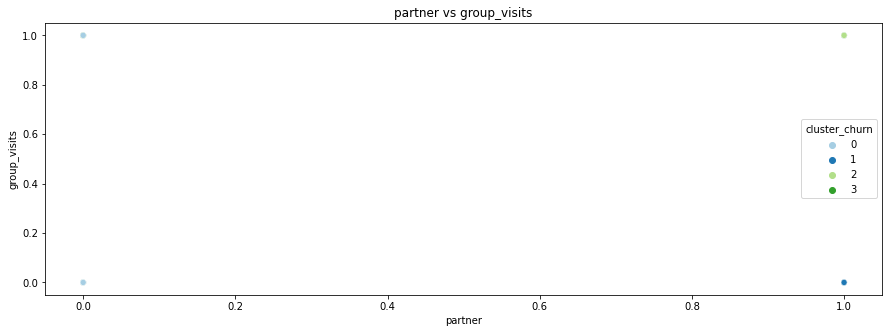

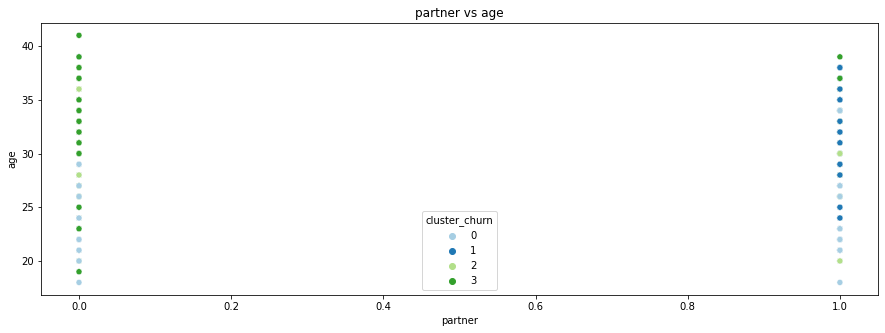

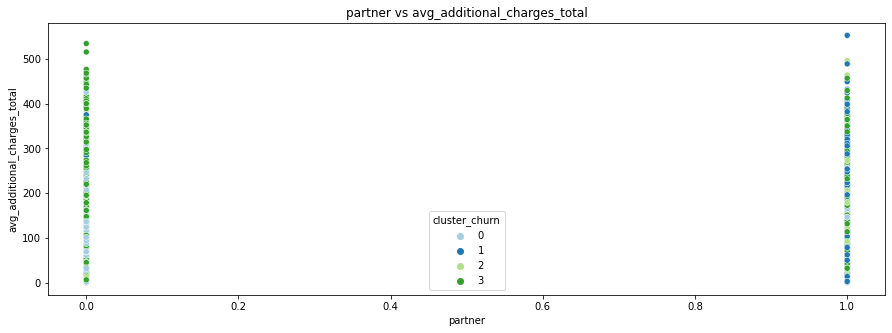

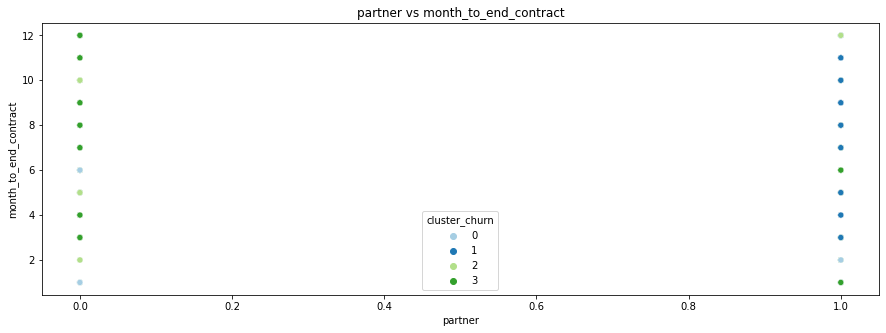

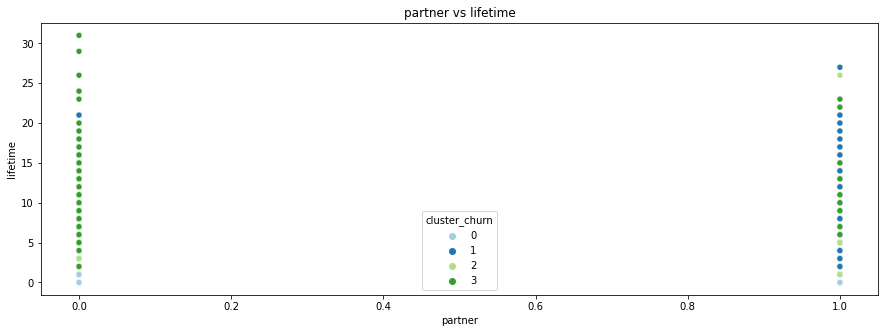

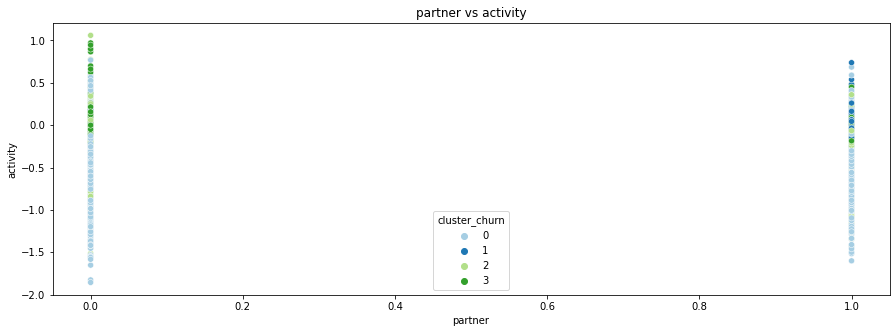

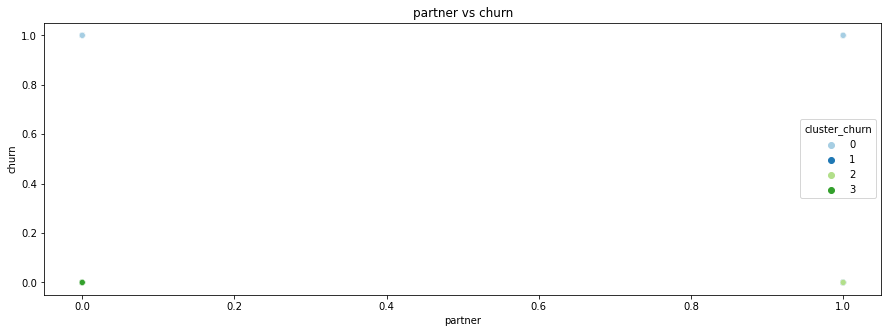

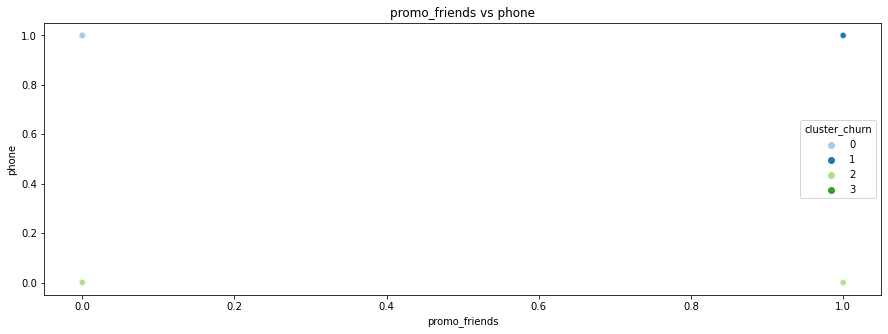

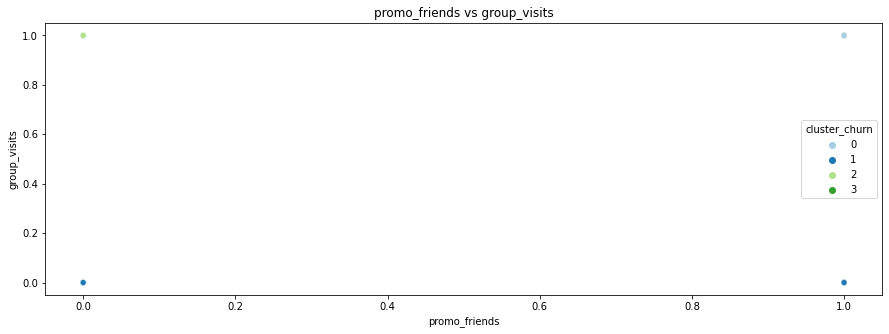

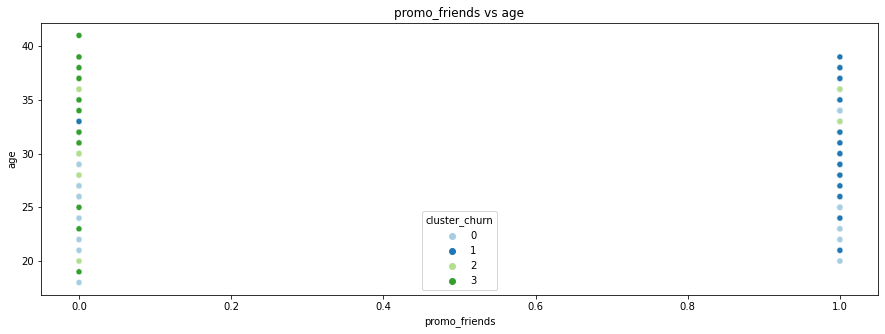

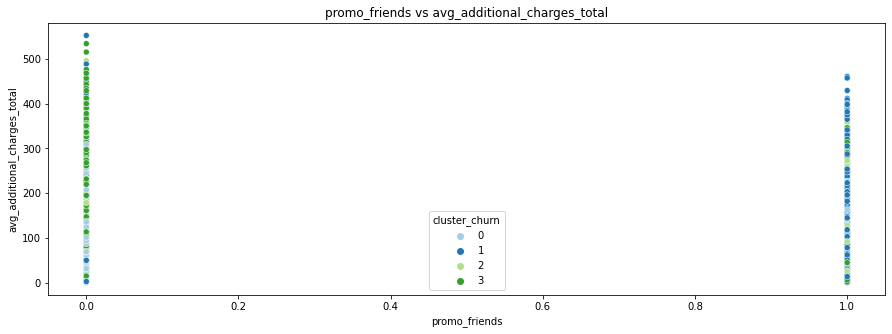

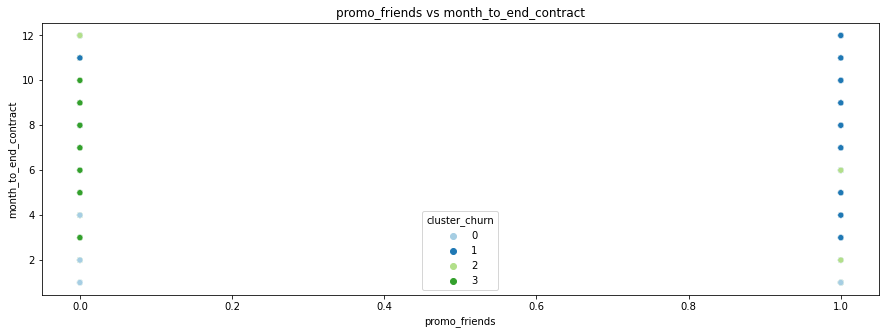

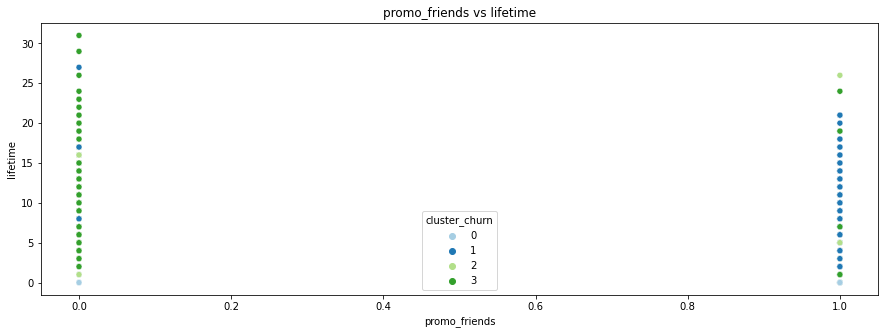

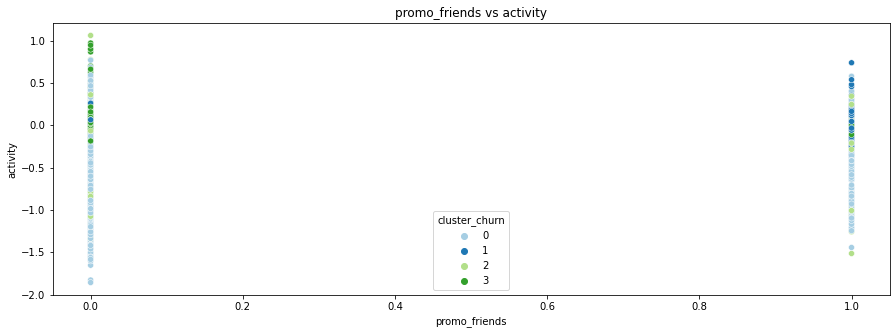

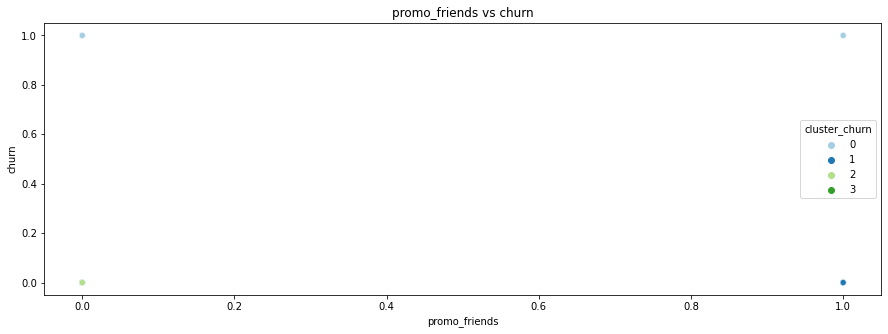

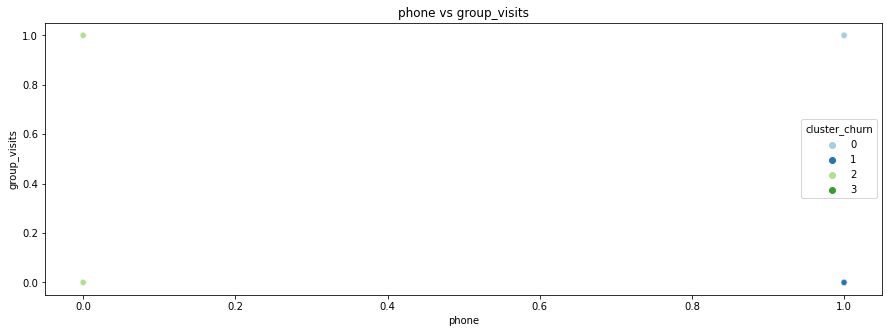

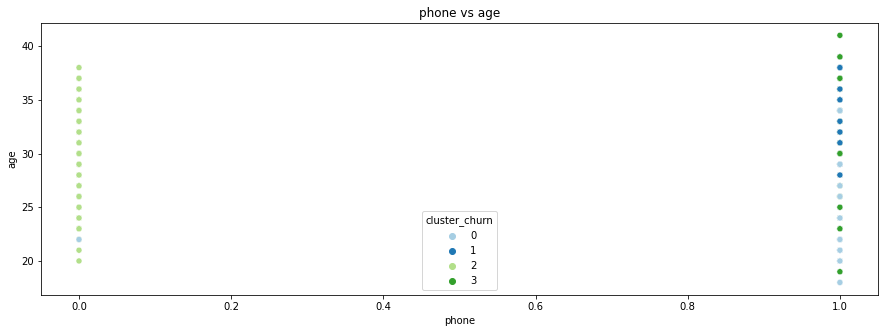

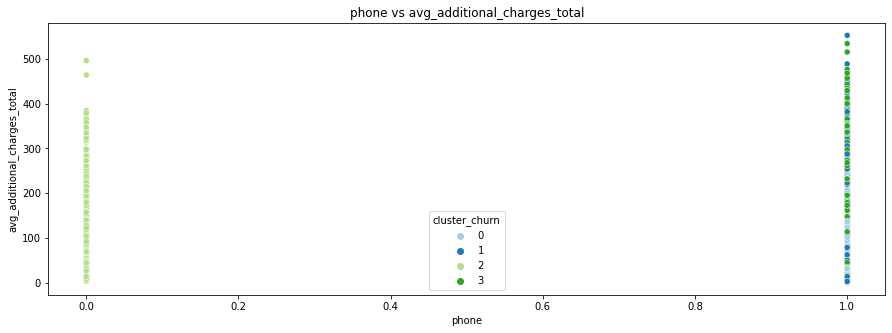

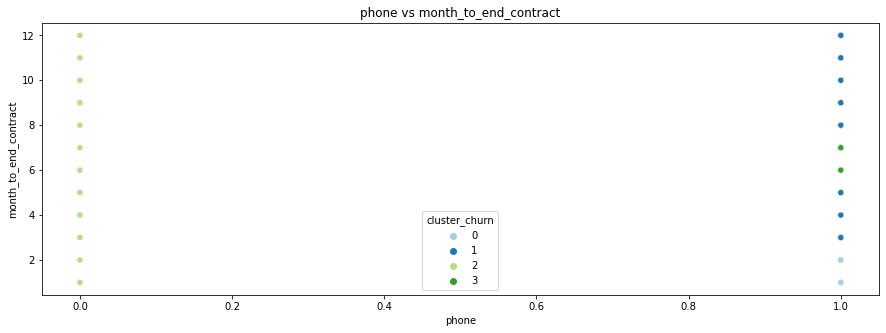

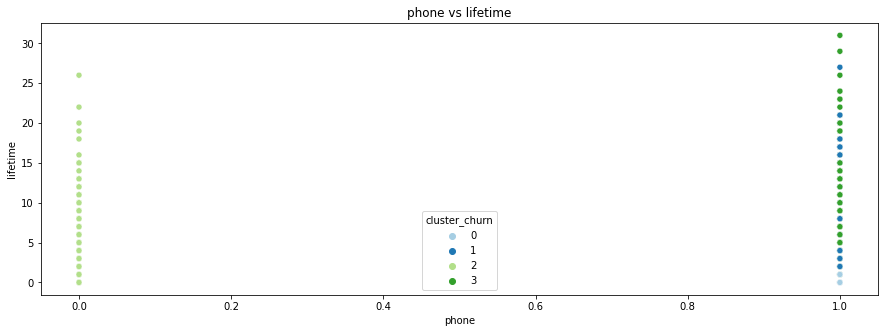

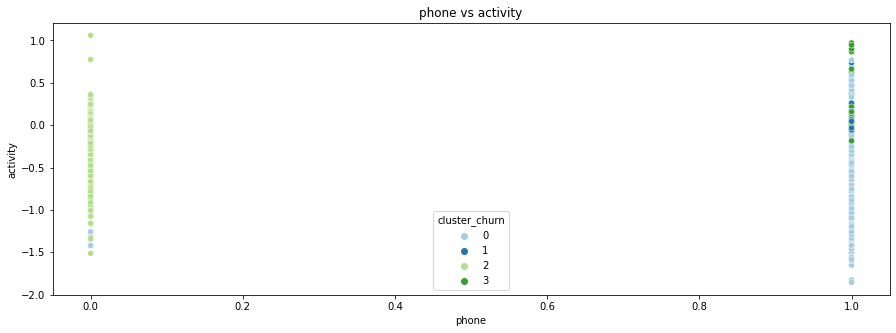

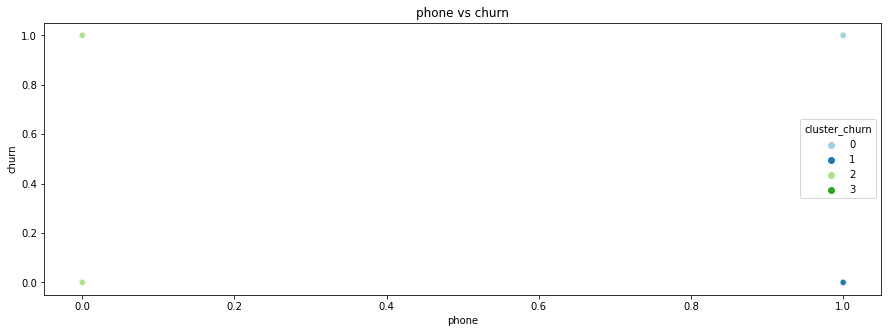

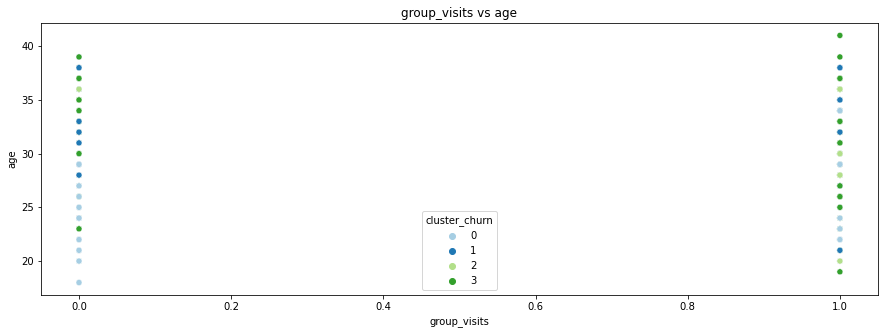

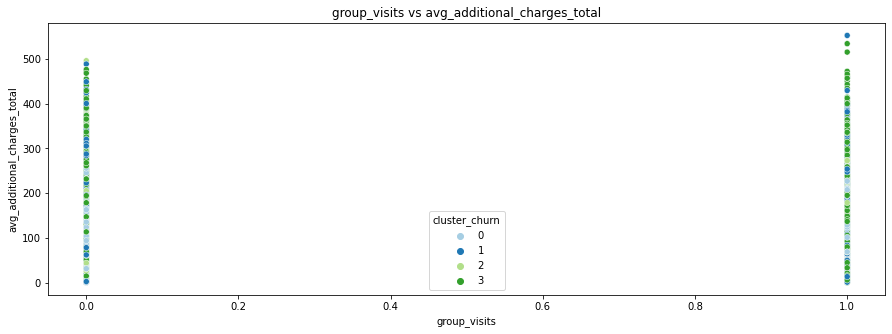

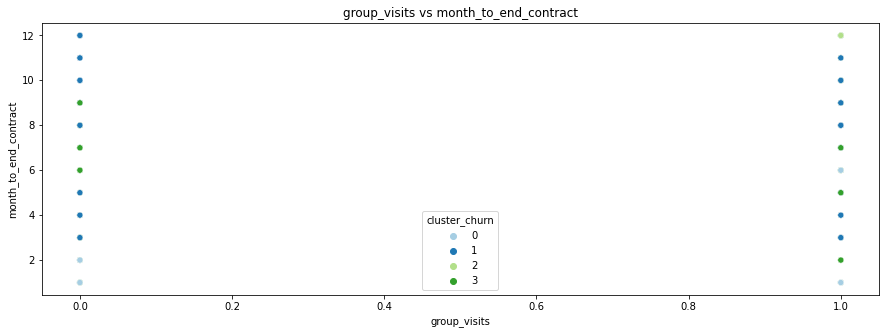

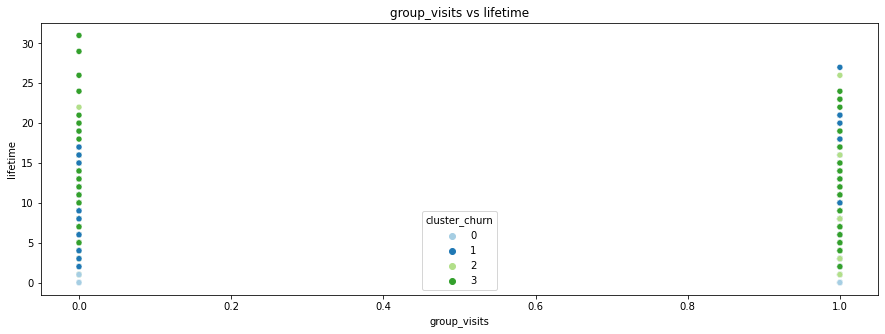

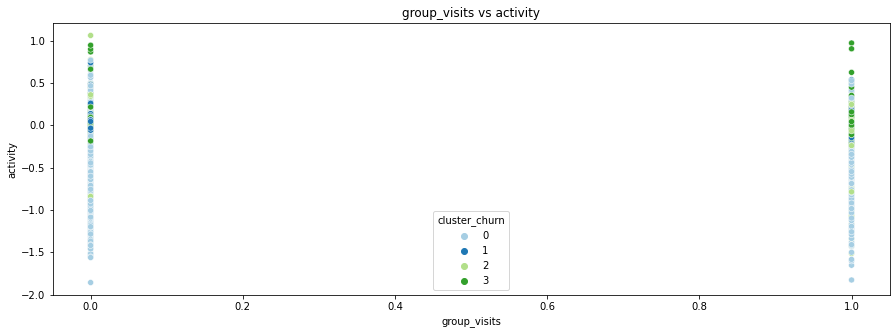

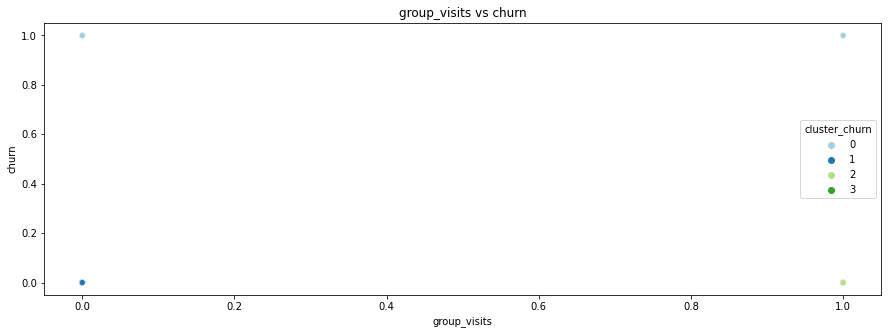

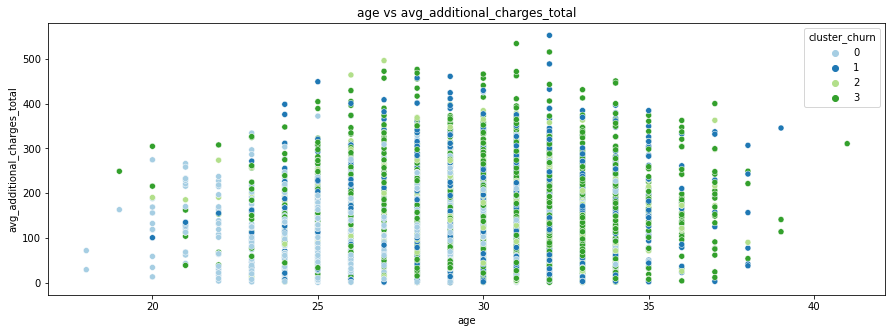

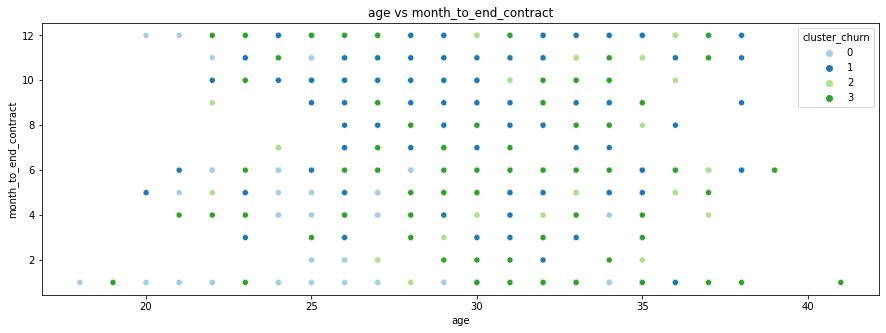

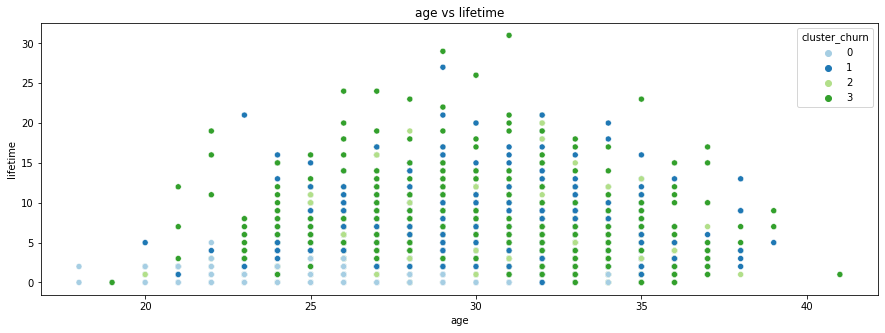

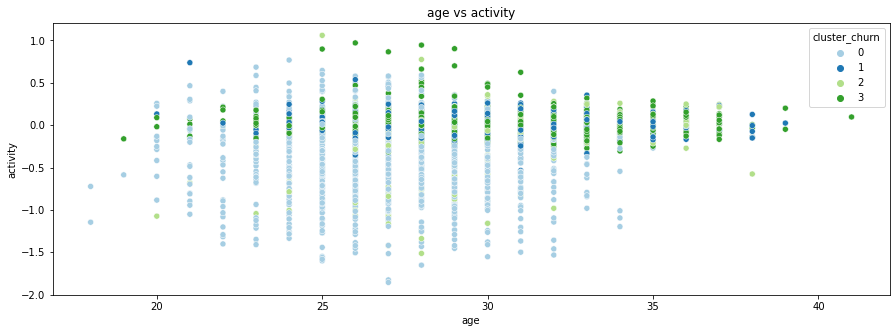

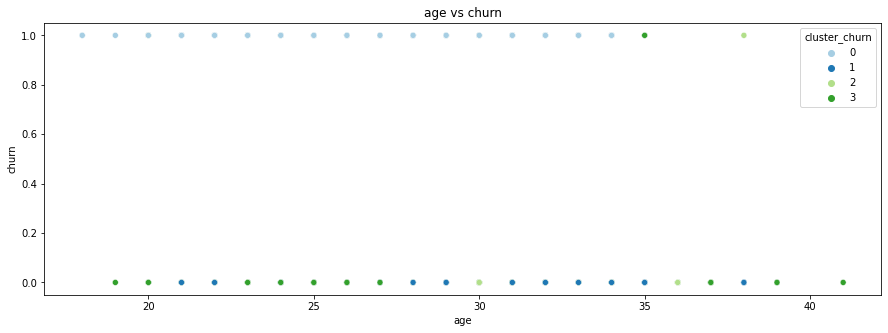

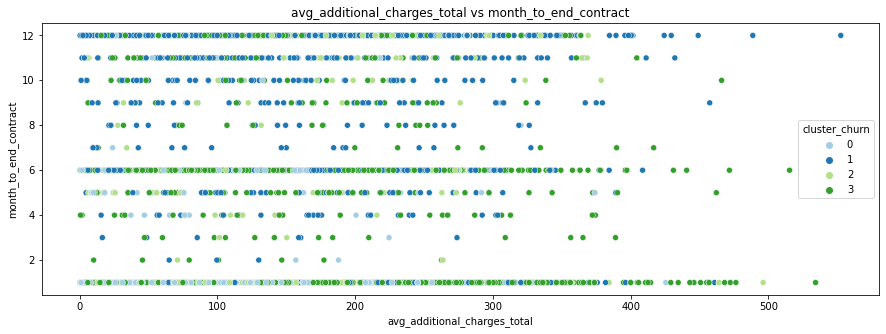

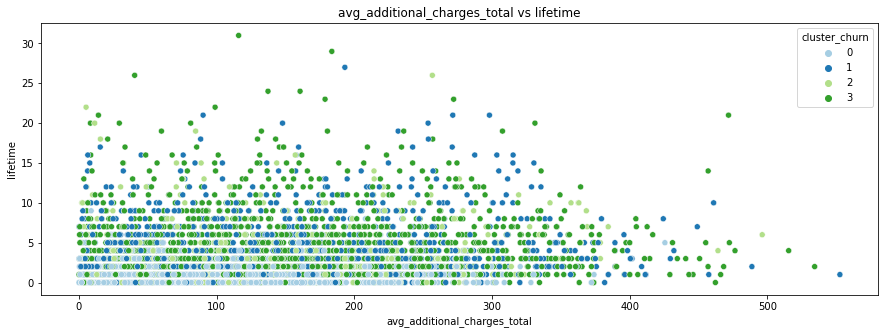

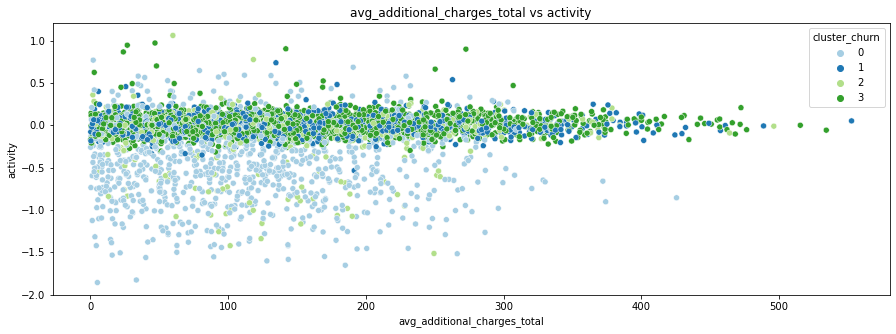

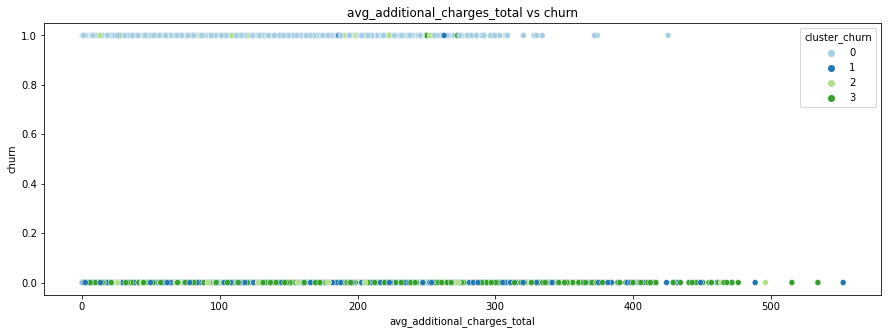

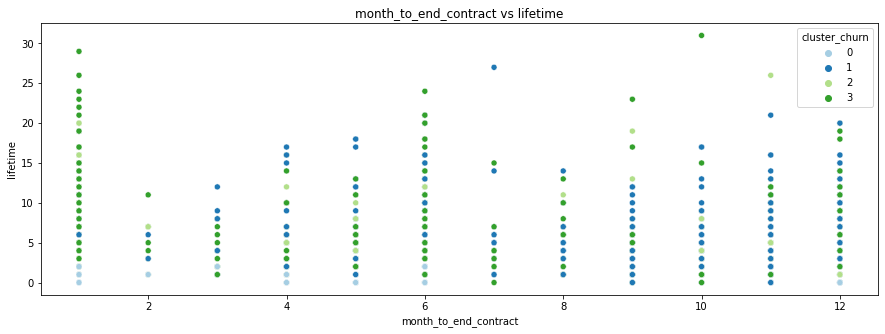

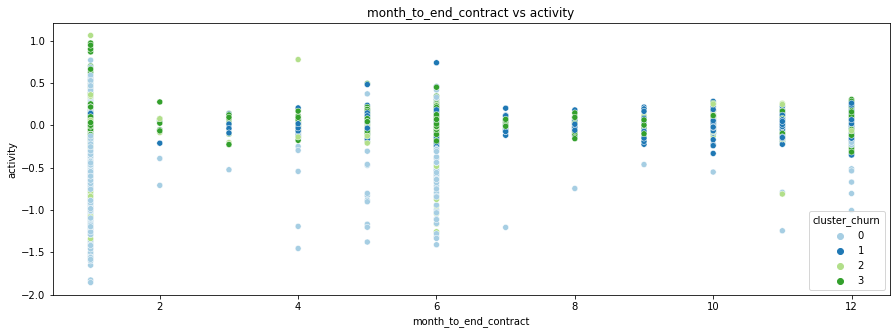

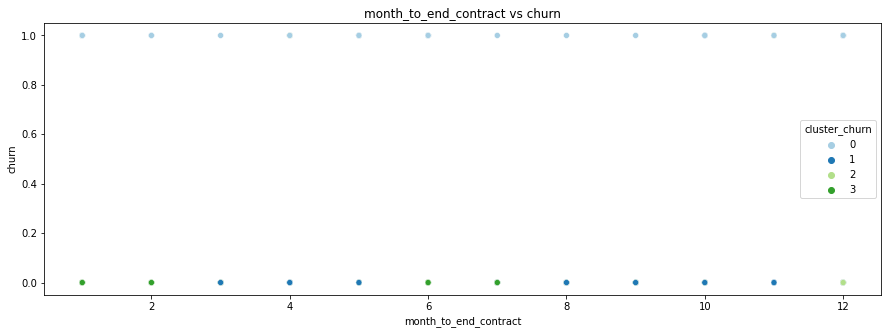

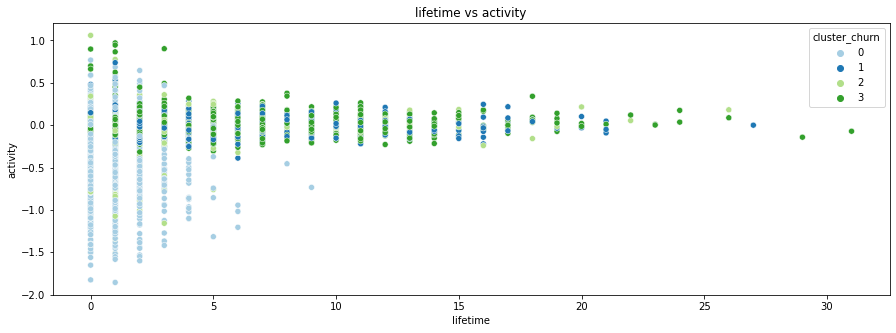

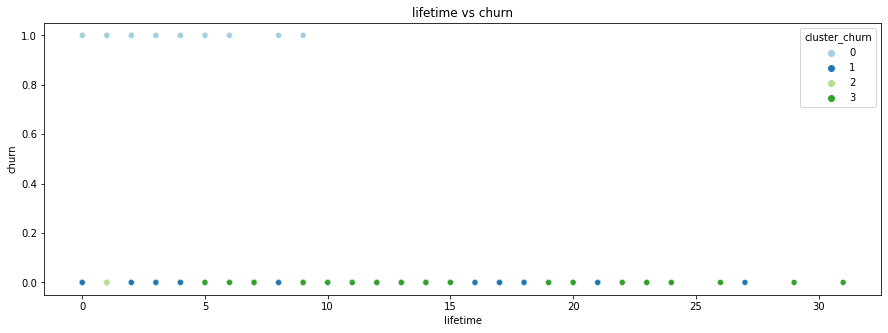

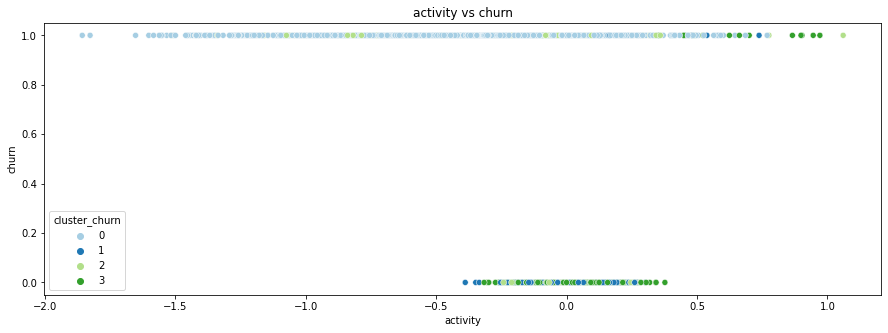

In [61]:
# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(df.drop('cluster_churn', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(df, pair[0], pair[1], 'cluster_churn')

Из интересного:  
Additional charges vs Activity - 0 кластер с высоким оттоком показывает низкую активность и чем меньше ходишь, тем реже появляется желание дополнительно что-то докупать.  
Lifetime vs Activity - кластер 0. Снижение активности происходит у кластера 0 на ранних этапах. Остальные кластеры занимаются стабильно.  
Lifetime vs Churn - у 0 кластера стабильно низкий лайфтайм.  
Activity vs Churn - у оставшихся активность балансирует в промежутке [-0.5...0.5].

### Оценка важности весов признаков

#### Логистическая регрессия
Создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности.

In [62]:
weights = lr_model.coef_[0]
w_0 = lr_model.intercept_[0]

lr_df = pd.DataFrame(data={'feature': x.columns, 'importance': weights})
display(w_0)
lr_df.sort_values('importance')

-3.450283072213579

,feature,importance
9,lifetime,-3.788231
10,activity,-1.550238
8,month_to_end_contract,-1.179000
6,age,-1.100716
7,avg_additional_charges_total,-0.516929
5,group_visits,-0.420475
3,promo_friends,-0.254606
1,near_location,-0.088526
2,partner,-0.084633
0,gender,-0.037016


Для наглядности соотношений, усредним наши результаты.

In [63]:
lr_df['importance'] = lr_df['importance'] / lr_df['importance'].sum()
lr_df.sort_values('importance', ascending = False)

,feature,importance
9,lifetime,0.422060
10,activity,0.172718
8,month_to_end_contract,0.131357
6,age,0.122635
7,avg_additional_charges_total,0.057593
5,group_visits,0.046847
3,promo_friends,0.028367
1,near_location,0.009863
2,partner,0.009429
0,gender,0.004124


#### Случайный лес

In [64]:
rf_df = pd.DataFrame(data={'feature': x.columns, 'importance': rf_model.feature_importances_})
rf_df.sort_values('importance', ascending=False)

,feature,importance
10,activity,0.502526
9,lifetime,0.208635
6,age,0.093088
8,month_to_end_contract,0.072470
7,avg_additional_charges_total,0.071452
5,group_visits,0.011375
2,partner,0.010486
3,promo_friends,0.009589
0,gender,0.009558
1,near_location,0.007259


В обеих моделях можно определить топ-6 показателей: активность, лайфтайм, возраст, оставшееся время абонемента, дополнительные траты и групповые занятия. Но поскольку метрики у случайного леса  оказались хоть чуть, но выше, чем у логистической регрессии, всё же будем ориентироваться на него.

## Выводы и рекомендации

### Портрет клиента, наиболее подверженного оттоку
Наиболее подвержен оттоку недавно прибывший молодой клиент с небольшим абонементом, активность которого сильно падает со временем, потому что он теряет энтузиазм. Также клиента, подверженному оттоку, можно определить по среднему чеку на дополнительные услуги - он обычно низкий.

### Наиболее влияющие на отток признаки
1. Один из ключевых признаков - это лайфтайм, но он скорее больше как индикатор работает, как показатель-следствие (чем ниже отток, тем выше лояльность), и напрямую с ним не поработать. 
2. Второй ключевой признак - активность, и не давать клиенту заскучать и снижать эту метрику уже вполне выполнимая задача.
3. Третий показатель - длительность абонемента. Здесь сложно сказать, человек хочет к нам ходить, поэтому берёт большой абонемент, или у него большой абонемент и поэтому он продолжает ходить, но в любом случае этот признак влияет достаточно сильно и с ним тоже можно поработать.
4. Видно, что более молодые клиенты менее стабильны: они быстро забивают. Когда более возрастная группа клиентов подходит к занятиям в зале более осознанно и зрело, с пониманием того, чего они хотят достигнуть.
5. Сопутствующие услуги хоть и не основные, что очевидно, однако если клиент не удоволетворён этими услугами и мало тратит денег на них, то он в группе риска.
6. Человек - существо социальное, поэтому одной из его потребностью является создавать и поддерживать социальные связи. Этому способствуют групповые занятия, которые дают доплонительный стимул: кому-то конкуренция, кому-то кооперация.

### Рекомендации по работе с целевой группой клиентов
* Чтобы снизить отток клиентов, необходимо пересмотреть работу с тренерами. Тренер - не надзиратель, а партнёр. У проблемных клиентов необходимо поддерживать достаточный уровень вовлечённости, чтобы их активность была стабильной - 2 занятия в неделю. Возможно пересмотреть отношение стоимости абонемента с/без тренера. Также необходимо наращивать интерес к групповым занятиям, возможно какие-то локальные интерактивы или соревнования.
* Если человек заплатил за полгода, вероятнее всего он, если потеряет интерес, вряд ли так легко дропнет тренировки и будет ходить из чувства упущенной выгоды. А потеря интереса может оказаться временной и его активность снова будет на прежнем уровне. Полезно будет рассмотреть для абонементов на 6+ месяцев сделать бонусное предложение - как вариант, бесплатный 1 сеанс массажа в месяц, X% скидки на кафе или Y% скидки на спорттовары. А лучше предоставить выбор клинету, на что именно скидку он хочет получить, по типу ежемесячного кэшбека в Тинькофф банке.